In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import missingno as msno
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

df = pd.read_csv('transformed_data.csv')
df=df.dropna(axis=0,inplace=False)
clean_text_df = pd.read_csv('clean_text.csv')
clean_text_df=clean_text_df.dropna(axis=0,inplace=False)
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

#df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
#df['punct%'] = df['text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
clean_text_df.head()

,title,text,value
0,"['trump', 'finally', 'admitted', 'something', ...","['throughout', 'donald', 'trump', 'entire', 'c...",False
1,"['president', 'obama', 'hilariously', 'skewer'...","['president', 'obama', 'took', 'aim', 'donald'...",False
2,"['interior', 'department', 'watchdog', 'drop',...","['washington', 'interior', 'department', 'insp...",True
3,"['watch', 'mika', 'brzezinski', 'turn', 'table...","['donald', 'trump', 'picked', 'fight', 'wrong'...",False
4,"['trump', 'say', 'want', 'provision', 'lower',...","['louisville', 'ky', 'president', 'donald', 't...",True


In [3]:
df.head()

,title,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len,twitter
0,Republican Jeb Bush offers U.S. education over...,WASHINGTON (Reuters) - Republican presidential...,True,-4600.0,-200.0,-4600.0,-4600.0,1.530209,2.673307,0.796907,4.541522,0
1,Idiot Pastor Loses His Damn Mind – Refuses To...,There are apparently still folks who believe t...,False,-5200.0,-200.0,-5200.0,-5200.0,1.551197,2.845656,0.807039,4.696120,0
2,BREAKING BOMBSHELL: 27 YR OLD Son Of Arkansas ...,Do black lives really matter to the Clinton s?...,False,-2600.0,-400.0,-2600.0,-2600.0,1.436214,2.527979,0.752537,4.146657,0
3,"6 SYRIAN, 1 LIBYAN MIGRANT ARRESTED After Sett...",Who still thinks Trump was wrong to say we nee...,False,-2800.0,-100.0,-2800.0,-2800.0,1.448089,2.382732,0.758002,3.938779,1
4,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",False,-13100.0,-300.0,-13100.0,-13100.0,1.718907,3.155921,0.886076,5.340205,0


In [4]:

del df['try']
df['punct%']=df['try2']
del df['try2']
df.head()

,title,text,value,body punct%,title punct%,punct%,count_punct,count_ws,body_len,twitter
0,Republican Jeb Bush offers U.S. education over...,WASHINGTON (Reuters) - Republican presidential...,True,-4600.0,-200.0,0.796907,1.530209,2.673307,4.541522,0
1,Idiot Pastor Loses His Damn Mind – Refuses To...,There are apparently still folks who believe t...,False,-5200.0,-200.0,0.807039,1.551197,2.845656,4.696120,0
2,BREAKING BOMBSHELL: 27 YR OLD Son Of Arkansas ...,Do black lives really matter to the Clinton s?...,False,-2600.0,-400.0,0.752537,1.436214,2.527979,4.146657,0
3,"6 SYRIAN, 1 LIBYAN MIGRANT ARRESTED After Sett...",Who still thinks Trump was wrong to say we nee...,False,-2800.0,-100.0,0.758002,1.448089,2.382732,3.938779,1
4,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",False,-13100.0,-300.0,0.886076,1.718907,3.155921,5.340205,0


In [5]:
#due to some majore issues with size, I will be reducing the df size
#after trial and error, 25% was found to be operable, 50%+ crashed the computer even with extra steps
#def dovide(x):
    #n=25
    #m=75
    #fir =x.tail(int(len(x)*(m/100)))
    #x = x.head(int(len(x)*(n/100)))
    #return x,fir

In [6]:
#df,df2= dovide(df)
df.shape

(34361, 10)

In [7]:
clean_text_df.head()

,title,text,value
0,"['trump', 'finally', 'admitted', 'something', ...","['throughout', 'donald', 'trump', 'entire', 'c...",False
1,"['president', 'obama', 'hilariously', 'skewer'...","['president', 'obama', 'took', 'aim', 'donald'...",False
2,"['interior', 'department', 'watchdog', 'drop',...","['washington', 'interior', 'department', 'insp...",True
3,"['watch', 'mika', 'brzezinski', 'turn', 'table...","['donald', 'trump', 'picked', 'fight', 'wrong'...",False
4,"['trump', 'say', 'want', 'provision', 'lower',...","['louisville', 'ky', 'president', 'donald', 't...",True


In [8]:
sum(df['twitter'])

21823

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# splitting and testing the body text

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'body_len', 'punct%']], df['value'], test_size=.45)


In [11]:
#tfidf_vect = TfidfVectorizer(analyzer=clean_text)
count_vect = CountVectorizer(min_df=.01, max_df=0.4)
tfidf_vect_fit = count_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)


X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,3183,3184,3185,3186,3187,3188,3189,3190,3191,3192
0,4.675377,0.817068,0,0,0,0,0,0,0,2,...,0,0,0,0,0,1,0,0,0,0
1,4.841460,0.839233,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.431995,0.801940,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.436134,0.803478,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
4,5.104352,0.886305,0,0,0,0,0,0,0,0,...,0,0,1,5,1,1,0,0,0,0


In [13]:
import pickle
from sklearn import svm
Pkl_Filename = "Test_Fit.pkl"
Pkl_Filename1 = "Vect.pkl"
Pkl_Filename2 = "Tfdiftr.pkl"
Pkl_Filename3 = "Tfdtest.pkl"
Pkl_Filename4 = "X_train.pkl"
Pkl_Filename5 = "x_test.pkl"
Pkl_Filename6 = "train.pkl"

#tfidf_vect_fit module
#with open(Pkl_Filename, 'wb') as file:  
#    pickle.dump(tfidf_vect_fit, file)
#tdfidf_vect file module
#with open(Pkl_Filename1, 'wb') as file:  
    #pickle.dump(tfidf_vect, file)
#tfidf_train file
with open(Pkl_Filename2, 'wb') as file:  
    pickle.dump(tfidf_train, file)
#with open(Pkl_Filename3, 'wb') as file:  
#    pickle.dump(tfidf_test, file)
with open(Pkl_Filename4, 'wb') as file:  
    pickle.dump(X_train_vect, file)
#with open(Pkl_Filename5, 'wb') as file:  
#    pickle.dump(X_test_vect, file)
with open(Pkl_Filename6, 'wb') as file:  
    pickle.dump(X_train, file)
    

In [14]:
X_train_vect.shape

(18898, 3195)

# Model Eval

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [16]:
rf = RandomForestClassifier(n_estimators=15, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train) 
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
print('RF Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

RF Fit time: 0.941 / Predict time: 0.419 ---- Precision: 0.966 / Recall: 0.966 / Accuracy: 0.966


In [18]:
#originally tested against RF, but the time/accuracy tradeoff did not make it worth it
gb = GradientBoostingClassifier(n_estimators=15, max_depth=None)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=False, average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 297.044 / Predict time: 0.698 ---- Precision: 0.932 / Recall: 0.932 / Accuracy: 0.932


C:\Users\alexr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to False) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [19]:
import pickle
from sklearn import svm
Pkl_Filename = "Test_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_model, file)
with open('gb_model.pkl', 'wb') as file:  
    pickle.dump(gb_model, file)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7921,  449],
       [ 610, 6483]], dtype=int64)

In [36]:
#So we see the values are close, but the gradient is a better option, unles the time is an issue

In [70]:
feature_names = X_test_vect[top_idx].columns
f_names = []
for i in range(len(feature_names)):
    f_names.append(str(feature_names[i]))
print(f_names)
xn = df.columns.astype(str)
print(xn)

['1448', '1837', '1552', '1278', '2981', '3002', '2403', '3129', '1388', '2108', '1109', '3109', '1698', '3190', '2905', '1447', '1601', '2317', '1', '1559', '1136', '0', '1380', '1835', '611', '3044', '3090', '3188', '3093', '3039']
Index(['title', 'text', 'value', 'body punct%', 'title punct%', 'punct%',
       'count_punct', 'count_ws', 'body_len', 'twitter'],
      dtype='object')


In [22]:
#From https://mljar.com/blog/feature-importance-in-random-forest/
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [23]:
rf.feature_importances_

array([1.52688307e-02, 1.35633552e-02, 3.05372941e-04, ...,
       1.86415057e-04, 1.50789076e-04, 5.51274246e-05])

<BarContainer object of 3195 artists>

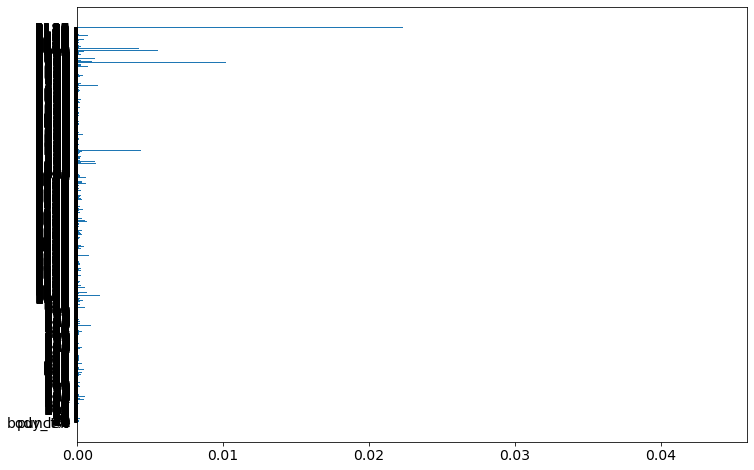

In [24]:
plt.barh(f_names, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

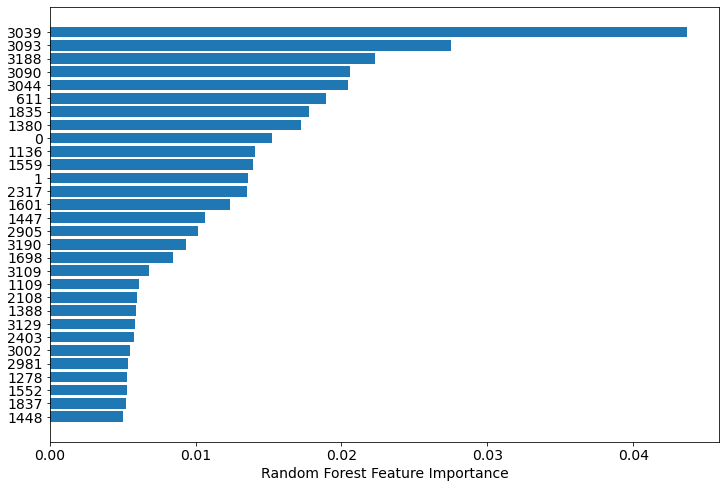

In [64]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(f_names, rf.feature_importances_[top_idx])
plt.xlabel("Random Forest Feature Importance")

In [62]:
top_idx = sorted_idx[3165:3195]
top_idx

array([1448, 1837, 1552, 1278, 2981, 3002, 2403, 3129, 1388, 2108, 1109,
       3109, 1698, 3190, 2905, 1447, 1601, 2317,    1, 1559, 1136,    0,
       1380, 1835,  611, 3044, 3090, 3188, 3093, 3039], dtype=int64)

In [61]:
import sys
np.set_printoptions(threshold=sys.maxsize)
len(sorted_idx)

3195

In [39]:
rf.feature_importances_[sorted_idx]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [74]:

X_test_vect[3193]=0
X_test_vect[3194]=0
X_test_vect[top_idx]

,1448,1837,1552,1278,2981,3002,2403,3129,1388,2108,...,1136,0,1380,1835,611,3044,3090,3188,3093,3039
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15459,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15461,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
gb.feature_importances_

array([ 1.63958929e-02,  5.70186471e-02,  1.12946782e-04,  2.16623999e-06,
        5.26559214e-20,  4.73687012e-04,  3.75083276e-21,  1.61995483e-05,
        1.35461816e-04,  3.34689692e-20,  2.09177599e-04,  0.00000000e+00,
        1.54422299e-05,  1.10285448e-05, -6.20330033e-21,  5.19346074e-21,
        2.18538359e-05,  1.81122707e-05,  8.57925754e-05,  9.33057059e-05,
        2.67075880e-06,  3.40409141e-06,  9.68708454e-06,  7.21313992e-21,
        2.55425781e-05,  3.86048081e-05,  1.13390560e-19,  3.03806818e-05,
        2.49642646e-05,  1.37169189e-05,  1.19897456e-04,  1.15799948e-04,
        1.00727583e-04,  6.89205890e-05,  0.00000000e+00,  1.56828550e-04,
        2.07070022e-04,  0.00000000e+00,  3.56793724e-05,  8.62979792e-04,
        1.67188988e-02,  1.99718723e-05,  1.30898284e-05,  5.23669140e-06,
        1.14049556e-04,  4.61640955e-21,  8.65576791e-21,  0.00000000e+00,
        1.45739156e-06,  1.31864474e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [71]:
feature_namess = X_test_vect.columns
f_namess = []
for i in range(len(feature_namess)):
    f_namess.append(str(feature_namess[i]))
print(f_namess)

['body_len', 'punct%', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '1